* [1.DataOverview](#1.DataOverview)
* [2.Visualization](#2.Visualization)
    * [2.1 Visulization for train_identity](#21)
    * [2.2 Visulization for train_transaction](#22)
    * [2.3 Visulization for test_transaction](#23)
* [3.LGBM/LR](#3.LGBM/LR)

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os 
import seaborn as sns
import geopandas as gpd
import folium
from folium import plugins
import datetime
import math

In [ ]:
os.listdir("../input/ieee-fraud-detection")

# 1.DataOverview

There are 5 csv in this data,including 'train_identity.csv','train_transaction.csv','test_transaction.csv','test_identity.csv',and 

'sample_submission.csv'.First, I will use the train data to make some visualization.

Please upvote it if you like this kernel.

Thank you

The photo is from:https://ac-illust.com/tw/clip-art/626399/%E4%B8%80%E9%9A%BB%E9%9E%A0%E8%BA%AC%E7%9A%84%E5%85%94%E5%AD%90

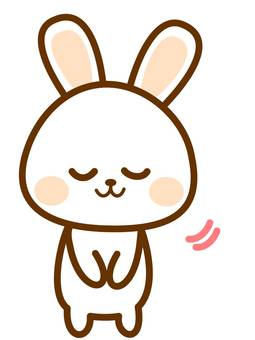

In [ ]:
train_identity=pd.read_csv("../input/ieee-fraud-detection/train_identity.csv")
train_transaction=pd.read_csv("../input/ieee-fraud-detection/train_transaction.csv")
test_transaction=pd.read_csv("../input/ieee-fraud-detection/test_transaction.csv")
test_identity=pd.read_csv("../input/ieee-fraud-detection/test_identity.csv")
print("train_identity_data_size: ",len(train_identity))
print("train_transaction_data_size: ",len(train_transaction))
print("test_transaction_data_size: ",len(test_transaction))
print("test_identity_data_size: ",len(test_identity))

# 2.Visualization

<h3 id="21">2.1 Visulization for train_identity</h3>

'train_identity.csv' data size is 144,233,and the variables include 'TransactionID','id_01',id_02,...other 38 type.

There are a lot of missing values in 'train_identity.csv'.especially 'id_24','id_25','id_07','id_08','id_21','id_26'

,'id_22','id_27',and'id_23'.



In [ ]:
train_identity.head()

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x=train_identity.isnull().sum().sort_values(ascending=False),y=train_identity.isnull().sum().sort_values(ascending=False).index)
plt.title("counts of missing value for train_identity",size=20)

I only use 'TransanctionID','id_01','id_12','id_38','id_37','id_36','id_35','id_15','id_29','id_28','id_11',
'id_02','DeviceType','id_31','id_17','id_19',and 'id_20' 'in train_identity.csv'.

Since there are too many missing values for other variable. 

In [ ]:
train_identity_new=pd.DataFrame(train_identity,columns=['TransactionID','id_01','id_12','id_38','id_37','id_36','id_35','id_15','id_29','id_28','id_11','id_02','DeviceType','id_31','id_17','id_19','id_20'])
train_identity_new=train_identity_new.dropna(subset=['id_38','id_37','id_36','id_35','id_15','id_29','id_28','id_11','id_02','DeviceType','id_31','id_17','id_19','id_20'])
train_identity_new.head()

In [ ]:
len(train_identity_new)

In [ ]:
plt.figure(figsize=(8,8))
corr = train_identity_new.corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,annot=True)
plt.title("correlation plot for train_identity_new",size=28)

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(20,20))
y=train_identity_new.id_01.value_counts().index
x=train_identity_new.id_01.value_counts()
sns.barplot(x=x,y=y,ax=ax[0,0],orient='h')
ax[0,0].set_title("Bar chart for id_01",size=20)
ax[0,0].set_xlabel('counts',size=18)
ax[0,0].set_ylabel('')

y=train_identity_new.id_12.value_counts().index
x=train_identity_new.id_12.value_counts()
sns.barplot(x=x,y=y,ax=ax[0,1])
ax[0,1].set_title("Bar chart for id_12",size=20)
ax[0,1].set_xlabel('counts',size=18)
ax[0,1].set_ylabel('')

y=train_identity_new.id_38.value_counts().index
x=train_identity_new.id_38.value_counts()
sns.barplot(x=x,y=y,ax=ax[1,0],order=['T','F'])
ax[1,0].set_title("Bar chart for id_38",size=20)
ax[1,0].set_xlabel('counts',size=18)
ax[1,0].set_ylabel('')

y=train_identity_new.id_37.value_counts().index
x=train_identity_new.id_37.value_counts()
sns.barplot(x=x,y=y,ax=ax[1,1],order=['T','F'])
ax[1,1].set_title("Bar chart for id_37",size=20)
ax[1,1].set_xlabel('counts',size=18)
ax[1,1].set_ylabel('')

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(20,20))
y=train_identity_new.id_36.value_counts().index
x=train_identity_new.id_36.value_counts()
sns.barplot(x=x,y=y,ax=ax[0,0],order=['T','F'])
ax[0,0].set_title("Bar chart for id_36",size=20)
ax[0,0].set_xlabel('counts',size=18)
ax[0,0].set_ylabel('')

y=train_identity_new.id_35.value_counts().index
x=train_identity_new.id_35.value_counts()
sns.barplot(x=x,y=y,ax=ax[0,1],order=['T','F'])
ax[0,1].set_title("Bar chart for id_35",size=20)
ax[0,1].set_xlabel('counts',size=18)
ax[0,1].set_ylabel('')

y=train_identity_new.id_15.value_counts().index
x=train_identity_new.id_15.value_counts()
sns.barplot(x=x,y=y,ax=ax[1,0])
ax[1,0].set_title("Bar chart for id_15",size=20)
ax[1,0].set_xlabel('counts',size=18)
ax[1,0].set_ylabel('')

y=train_identity_new.id_29.value_counts().index
x=train_identity_new.id_29.value_counts()
sns.barplot(x=x,y=y,ax=ax[1,1])
ax[1,1].set_title("Bar chart for id_29",size=20)
ax[1,1].set_xlabel('counts',size=18)
ax[1,1].set_ylabel('')

<h3 id="22">2.2 Visulization for train_transaction</h3>

'train_transaction.csv' data size is 590,540,and the variables include 'TransactionID','isFraud','TransactionDT',...other 391 type.

There are a lot of missing values in 'train_transaction.csv'.especially 'dist 2','D7','D13','D14','D12','D6','D8','D9'.

In [ ]:
del train_identity
del test_identity
train_transaction.head()

In [ ]:
len(train_transaction)

In [ ]:
plt.figure(figsize=(18,70))
sns.barplot(x=train_transaction.isnull().sum().sort_values(ascending=False),y=train_transaction.isnull().sum().sort_values(ascending=False).index)
plt.title("counts of missing value for train_transaction",size=20)

In [ ]:

train_transaction_new=pd.DataFrame(train_transaction,columns=train_transaction.isnull().sum().sort_values()[:250].index)
train_transaction_new=train_transaction_new.drop(columns=['TransactionID'])
train_transaction_new_label=train_transaction_new.isFraud
train_transaction_new=train_transaction_new.drop(columns=['isFraud'])
train_transaction_new.head()

In [ ]:
len(train_transaction_new)

<h3 id="23">2.3 Visulization for test_transaction</h3>

In [ ]:
test_transaction.head()

In [ ]:
len(test_transaction)

In [ ]:
plt.figure(figsize=(18,70))
sns.barplot(x=test_transaction.isnull().sum().sort_values(ascending=False),y=test_transaction.isnull().sum().sort_values(ascending=False).index)
plt.title("counts of missing value for test_transaction",size=20)

In [ ]:
test_transaction_new=pd.DataFrame(test_transaction,columns=train_transaction.isnull().sum().sort_values()[:250].index)
del test_transaction
del train_transaction
ID=test_transaction_new.TransactionID
test_transaction_new=test_transaction_new.drop(columns=['TransactionID','isFraud'])
test_transaction_new.head()

In [ ]:
len(test_transaction_new)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in list(train_transaction_new.select_dtypes(include=['object']).columns):
    test_transaction_new[i] = labelencoder.fit_transform(test_transaction_new[i].astype('str'))
    train_transaction_new[i] = labelencoder.fit_transform(train_transaction_new[i].astype('str'))
test_transaction_new.ProductCD[:5]


In [ ]:
train_transaction_new.ProductCD[:5]

In [ ]:
#train_transaction_new=train_transaction_new.fillna(-999)
#test_transaction_new=test_transaction_new.fillna(-999)
train_transaction_new=train_transaction_new.fillna(train_transaction_new.median())
test_transaction_new=test_transaction_new.fillna(train_transaction_new.median())

# 3.LGBM/LR

In [ ]:
from sklearn.linear_model import LogisticRegression  
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train_transaction_new,train_transaction_new_label,test_size=0.2)
del train_transaction_new
lr = LogisticRegression(C=0.09,solver='lbfgs')  
lr.fit(X_train, y_train)  
proba_test = lr.predict_proba(X_test)[:, 1]
LR_result=pd.DataFrame({'pred':proba_test,'real':y_test})
LR_result['pred_0_1']=LR_result.pred.apply(lambda x:1 if x>=0.5 else 0)

In [ ]:
print('LR_acc: ',sum(LR_result.real==LR_result.pred_0_1)/len(LR_result))

In [ ]:
import lightgbm as lgb  
import pickle  
from sklearn.metrics import roc_auc_score  
lgb_train = lgb.Dataset(X_train, y_train)  
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train) 
params = {  
    'boosting_type': 'gbdt',  
    'objective': 'binary',  
    'metric': {'binary_logloss', 'auc'},  
    'num_leaves':240,  
    'max_depth': 15,  
    'min_data_in_leaf': 100,  
    'learning_rate': 0.05,  
    'feature_fraction': 0.95,  
    'bagging_fraction': 0.95,  
    'bagging_freq': 5,  
    'lambda_l1': 0,    
    'lambda_l2': 0, 
    'min_gain_to_split': 0.1,  
    'verbose': 0,  
    'is_unbalance': True  
}  

In [ ]:
gbm = lgb.train(params,  lgb_train,  
                num_boost_round=10000,  
                valid_sets=lgb_eval,early_stopping_rounds=500)  

In [ ]:
gbm.predict(test_transaction_new[:10], num_iteration=gbm.best_iteration) 

In [ ]:
LR_TEST=lr.predict_proba(test_transaction_new)[:, 1]
LGBM_TEST= gbm.predict(test_transaction_new, num_iteration=gbm.best_iteration) 

prediction=pd.DataFrame({'TransactionID':ID,'LR_TEST':LR_TEST,'LGBM_TEST':LGBM_TEST})

prediction.to_csv('prediction.csv',index=False)

submission=pd.DataFrame({'TransactionID':ID,'isFraud':LGBM_TEST})


submission.to_csv('submission.csv',index=False)